## Laplace equation
$$
\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2} = 0
$$

$$
\frac{{{p^{n}_{i,j + 1}} - 2{p^{n}_{i,j}} + {p^{n}_{i,j - 1}}}}{{{\Delta y ^2}}} + \frac{{{p^{n}_{i + 1,j}} - 2{p^{n}_{i,j}} + {p^{n}_{i - 1,j}}}}{{{\Delta x ^2}}} = 0\\
$$

$$
p^{n}_{i,j} = \frac{\Delta y^2 (p^{n}_{i + 1,j} + p^{n}_{i - 1,j}) + \Delta x^2 (p^{n}_{i,j+1} + p^{n}_{i,j-1})}{2(\Delta y^2 + \Delta x^2)}
$$




IC and BC

$p = 0$ at $x = 0$

$p = y$ at $x = xmax$

$\frac{\partial p}{\partial y} = 0$ at $y = 0,ymax$


In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, cm
from mpl_toolkits.mplot3d import Axes3D  

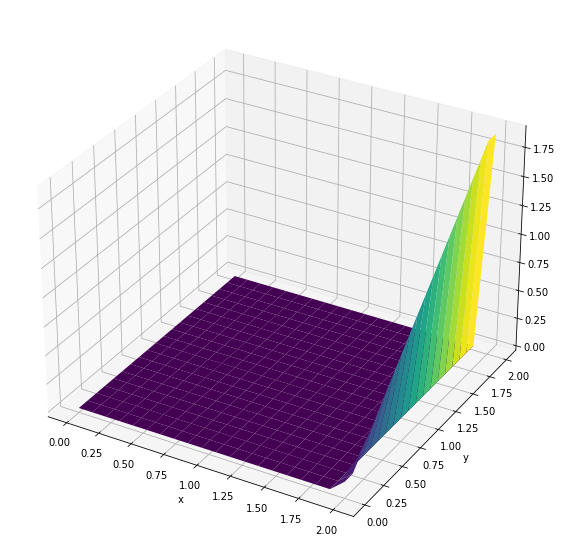

In [2]:
#constant 

x_max = 2
y_max = 2
nx = 20
ny = 20
dx = x_max / (nx)
dy = y_max / (ny)
xs = np.linspace(0, x_max, nx)
ys = np.linspace(0, y_max, ny)


#init 
p0 = np.zeros((ny,nx))
#BC
p0[:,-1] = ys
p0[0,:] = p0[1,:]
p0[-1:] = p0[-2,:]


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                     
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, p0, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


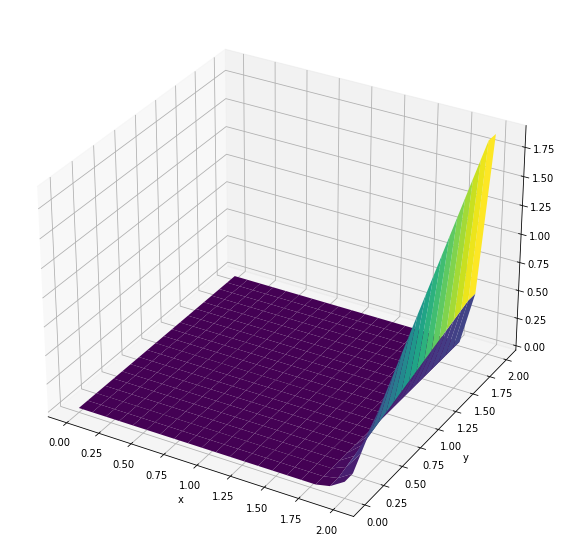

In [3]:
#finite difference 
p = p0.copy()

for _ in range(300):
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            p0[i,j] = ((dy**2 * (p[i+1,j] + p[i-1,j])) + (dx**2 * (p[i,j+1] + p[i,j-1]))) / (2 * (dx**2 + dy**2))

            p0[:,-1] = ys
            p0[0,:] = p0[1,:]
            p0[-1:] = p0[-2,:]

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, p0, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()



3372


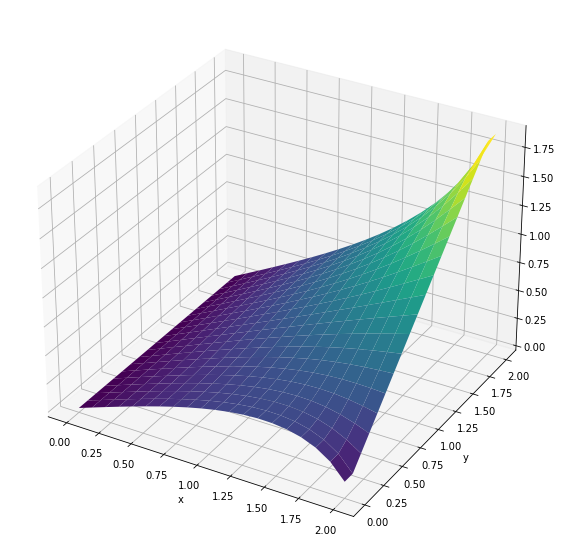

In [4]:
# with while loop 

p = p0.copy()
n = 0

target = 1e-10

while True:
    p = p0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            # p0[i,j] = dy**2 * (p[i+1,j] + p[i-1,j]) + dx**2 * (p[i,j+1] + p[i,j-1]) / (2 * (dx**2 + dy**2))
            p0[i,j] = 1/4 * (p[i+1,j] + p[i-1,j] + p[i,j+1] +p[i,j-1])
            p0[:,-1] = ys
            p0[0,:] = p0[1,:]
            p0[-1:] = p0[-2,:]
    n = n+ 1
    error = (abs(np.sum(np.abs(p)) -np.sum(np.abs(p0))))
    if (error < target):
        print(n)
        break
    if n == 5000:
        print(n)
        break


fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(xs, ys)                            
surf = ax.plot_surface(X, Y, p0, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


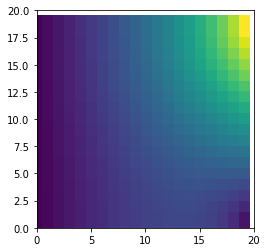

In [5]:
# animate
p0 = np.zeros((ny,nx))
#BC
p0[:,-1] = ys
p0[0,:] = p0[1,:]
p0[-1:] = p0[-2,:]


fig, ax = plt.subplots()
ax = plt.axes(xlim=(0, nx), ylim=(0, ny))
line = plt.imshow(p0)


def animate(frames):
    p = p0.copy()
    for i in range(1,nx-1):
        for j in range(1,ny-1):
            p0[i,j] = 1/4 * (p[i+1,j] + p[i-1,j] + p[i,j+1] +p[i,j-1])
            p0[:,-1] = ys
            p0[0,:] = p0[1,:]
            p0[-1:] = p0[-2,:]
              
    line.set_data(p0)
    return line

anim = animation.FuncAnimation(fig, animate, frames=3372, repeat=False)
anim.save('2d laplace.gif', fps = 20)